# COST INTERACT ML Challenge (PHY) - Baseline

The code contained in this notebook serves as the baseline code provided by the organizers of the COST INTERACT ML challenge (PHY). The baseline implements a CNN model for direct positioning, originally presented in the original paper "CSI-based positioning in massive MIMO systems using convolutional neural networks", S. De Bast et. Al (link: https://ieeexplore.ieee.org/abstract/document/9129126). The baseline is provided as a starting point for participants to build upon.

Authors: Marco Skocaj (HA1 Chair, Università di Bologna, Italy), Nicola Di Cicco (Politecnico di Milano, Italy)

In [49]:
# Import libraries
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from build_model import build_model

# Check tensorflow version (tf <= 2.10 required for native gpu support on Windows)
print(tf.__version__)

# Check tf is running on gpu
print(tf.config.list_physical_devices('GPU'))

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


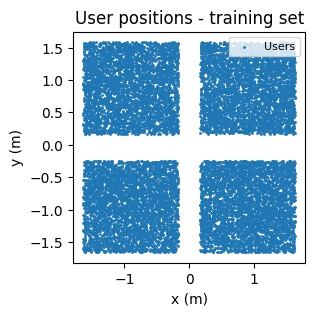

In [50]:
data_fpath = r"C:\Users\skoca\PycharmProjects\MLcomp_INTERACT_PHY_bundle\starting_kit"

# Your local path here
fpath_positions = f"{data_fpath}/train_labels/positions_train.npy"
fpath_train = f"{data_fpath}/train"
fpath_val = f"{data_fpath}/val"
fpath_test = f"{data_fpath}/test"

# Read user positions (labels) and antenna positions
y_train = np.load(fpath_positions)
# Plot 2D positions
plt.figure(figsize=(3, 3))
plt.scatter(y_train[:, 0], y_train[:, 1], s=1, label='Users')
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('User positions - training set')
plt.show()

In [51]:
### Train model on training set ###
def process_complex(X_complex):
    X_real = np.real(X_complex)
    X_imag = np.imag(X_complex)
    return np.stack((X_real, X_imag), axis=-1)

# Read CSI training files from train folder
print(f"Reading training files from {fpath_train}...")
train_files = glob.glob(f"{fpath_train}/*.npy")

# Load all files into a np array
X_train = np.array([process_complex(np.load(f)) for f in train_files])
print("Done!")
print("Training shape: ", X_train.shape)

Reading training files from C:\Users\skoca\PycharmProjects\MLcomp_INTERACT_PHY_bundle\starting_kit/train...
Done!
Training shape:  (15000, 64, 100, 2)


(None, 64, 2)
(None, 64, 100, 1)
(None, 64, 100, 1)
total (None, 64, 100, 6)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 100, 2)  0           []                               
                                ]                                                                 
                                                                                                  
 lambda_7 (Lambda)              (None, 64, 100)      0           ['input_2[0][0]']                
                                                                                                  
 lambda_8 (Lambda)              (None, 64, 100)      0           ['input_2[0][0]']                
                                                                                                  
 multiply_2 (Mu

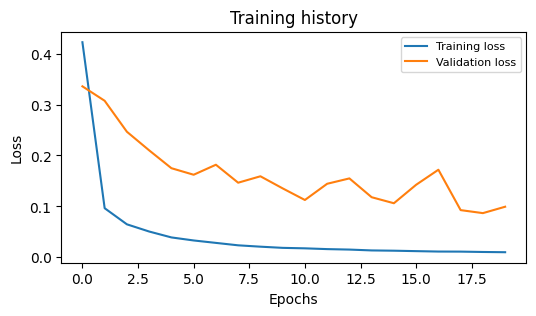

In [52]:
# Build and compile model
model = build_model()

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Plot training history
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training history')
plt.show()

In [65]:
### Predict on validation set ###

# Read CSI training files from val folder (for phase 2 of the challenge, this should be done on the test folder)
print(f"Reading validation files from {fpath_val}...")
val_files = glob.glob(f"{fpath_val}/*.npy")

# Load all files into a np array
X_val = np.array([process_complex(np.load(f)) for f in val_files])
print("Done!")

# Predict on validation set
y_val_pred = model.predict(X_val)

Reading validation files from C:\Users\skoca\PycharmProjects\MLcomp_INTERACT_PHY_bundle\starting_kit/val...
Done!
157/157 [==============================] - 2s 12ms/step


0

In [ ]:
# Save predictions to csv file in data_fpath folder and zip it.
#  The zipped file should be used for score submission on Codalab.
np.savetxt(f"{data_fpath}/preds.csv", y_val_pred, delimiter=",")
is_written = os.system(f"zip preds.zip preds.csv")

if ~is_written:
    print("Predictions saved to preds.zip")
else:
    print("Error while saving predictions to preds.zip")

In [1]:
# You can test the logic of the scoring mechanism on Codalab here.
#  Just be sure to keep a held-out validation set from the original training set with features and labels.

def score(truth: pd.DataFrame, preds: pd.DataFrame):
    truth = truth.values
    preds = preds.values

    # Compute the average positioning error between predictions and ground truth
    mae = np.mean(np.sqrt(np.sum((truth - preds) ** 2, axis=1)))
    return mae

truth = pd.read_csv(r"your_ground_truth.csv")
preds = pd.read_csv(r"your_preds.csv", header=None)  # It is important to keep the header=None.
                                                     # If removed, it will interfere with the scoring mechanism on Codalab.

print("Standardized MAE: ", score(truth, preds))

NameError: name 'pd' is not defined